In [1]:
# forest coverytpes dataset, isprobavanje raznih klasifikatora

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype

podaci = fetch_covtype(as_frame = True)

## NAĐE DESKRIPTOR, KOJI JE ODSKOČNA DASKA ZA DALJNJU ANALIZU PODATAKA
print(podaci["DESCR"])
## IMA 7 KLASA I 54 STUPCA, NEKI SU BINARNI NEKI NISU

dataPd = pd.DataFrame(podaci.data)
targetPd = pd.DataFrame(podaci.target)

dataPd.head()


.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


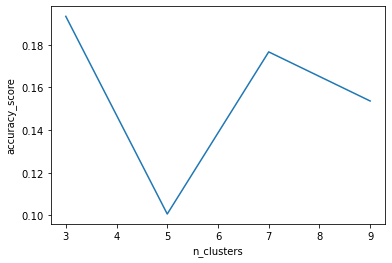

In [5]:
                                                
                                                                            ## K-MEANS ##

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# podaci koje uzimamo biti će Horizontal_Distance_To_Hydrology, te target podaci o klasama
## EDIT: UZEO SAM U OBZIR SVE PODATKE, JER JE Horizontal_Distance_To_Hydrology DAVAO PRELOŠE REZULTATE
## EDIT2: UZEO SAM U OBZIR SAMO PRVIH DEVET STUPACA, JER OSTALI IMAJU BINARNE VRIJEDNOSTI
## EDIT3: UZEO SAM U OBZIR SVE OSIM PRVIH DEVET STUPACA. ZAKLJUČAK : k-means nije valjan
 
podaci = fetch_covtype()
#x = np.array(podaci.data[:,3]).reshape(-1,1)
x = np.array(podaci.data)
y = np.array(podaci.target).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y)

# zatim, povečavamo broj klastera i plotamo točnost predikcije, sve dok ne nađemo optimalan broj klastera. (to bi trebao biti 7 jer znamo da imamo 7 ciljanih klasa)
accuracy = []
# od 3, do nekog broja, svaka dva broja. tako se pobrinemo da uzimamo NEPARAN broj klastera. a odmah preskočimo klasifikaciju na 1 i 2 klastera
range1 = range(3,10,2)

for n_clusters in range1:

    kmeansClf = KMeans(n_clusters=n_clusters)
    kmeansClf.fit(x_train,y_train)
    y_pred = kmeansClf.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    
plt.xlabel("n_clusters")
plt.ylabel("accuracy_score")
plt.plot(range1,accuracy)



In [40]:
# s obzirom da mu je najbolji broj klastera 3, a znamo da imamo 7 klasa - možemo zaključiti već po ovome kako nije valjan način klasifikacije.
# također, acc score je daleko od dobrog.
# k-means dalje neću ni probavati


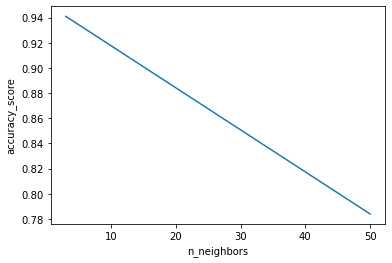

In [6]:

                                                                            ## KNN ##

from sklearn.neighbors import KNeighborsClassifier


## UZIMAM SAMO PRVIH 9 STUPACA, ZBOG UNIFORMNOSTI PODATAKA
x = np.array(podaci.data)[:,:9]
y = np.array(podaci.target)
x_train,x_test,y_train,y_test = train_test_split(x,y)

range1 = (3,50)
accuracy = []

for n_neighbors in range1:

    knnClf = knnClf = KNeighborsClassifier(n_neighbors = n_neighbors)
    knnClf.fit(x_test,y_test)
    y_pred = knnClf.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))

plt.xlabel("n_neighbors")
plt.ylabel("accuracy_score")
plt.plot(range1,accuracy)

KNN:
               precision    recall  f1-score   support

           1       0.91      0.91      0.91     52941
           2       0.92      0.93      0.92     70841
           3       0.92      0.91      0.91      8919
           4       0.89      0.79      0.84       649
           5       0.82      0.77      0.80      2358
           6       0.86      0.84      0.85      4341
           7       0.94      0.92      0.93      5204

    accuracy                           0.91    145253
   macro avg       0.89      0.87      0.88    145253
weighted avg       0.91      0.91      0.91    145253



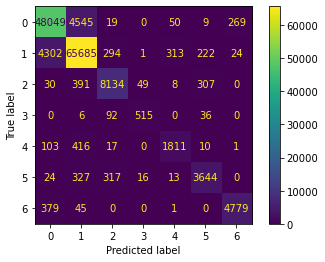

In [7]:
# zaključak je da KNN funkcionira najbolje s n_neigbors = 3. Daljnje testiranje ću izvoditi s tim parametrom

knnClf = KNeighborsClassifier(n_neighbors=3)
knnClf.fit(x_train,y_train)
y_pred = knnClf.predict(x_test)
report = classification_report(y_test,y_pred)
print("KNN:\n",report)

cnf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cnf).plot()

acc: 0.86
KNN:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86     53251
           2       0.88      0.88      0.88     70534
           3       0.83      0.84      0.84      8920
           4       0.77      0.73      0.75       655
           5       0.73      0.67      0.70      2386
           6       0.72      0.70      0.71      4381
           7       0.87      0.85      0.86      5126

    accuracy                           0.86    145253
   macro avg       0.81      0.79      0.80    145253
weighted avg       0.86      0.86      0.86    145253



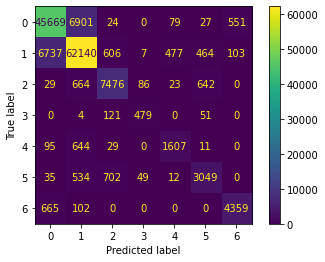

In [8]:

                                                                        ## DECISION TREE ##

from sklearn.tree import DecisionTreeClassifier

treeClf = DecisionTreeClassifier(class_weight= 'balanced', min_impurity_decrease= 0.000000001, max_features = 9, min_samples_leaf= 1)

## UZIMAM SAMO PRVIH 9 STUPACA, RADi UNIFORMNOSTI PODATAKA
x = np.array(podaci.data)[:,:9]
y = np.array(podaci.target)
x_train,x_test,y_train,y_test = train_test_split(x,y)

treeClf.fit(x_train,y_train)
y_pred = treeClf.predict(x_test)
print("acc:",round(accuracy_score(y_test,y_pred),2))

## ŠTO GOD NAMJESTIO OD PARAMETARA, TOČNOST JE NAJVIŠA OKO 0.85

report = classification_report(y_test,y_pred)
print("KNN:\n",report)

cnf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cnf).plot()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

rndTreeClf = RandomForestClassifier(criterion = 'entropy')

x = np.array(podaci.data)[:,:9]
y = np.array(podaci.target)
x_train,x_test,y_train,y_test = train_test_split(x,y)

rndTreeClf.fit(x_train,y_train)

              precision    recall  f1-score   support

           1       0.91      0.90      0.91     52865
           2       0.91      0.94      0.92     70807
           3       0.90      0.90      0.90      9015
           4       0.85      0.82      0.83       683
           5       0.92      0.62      0.74      2384
           6       0.86      0.75      0.80      4333
           7       0.96      0.88      0.91      5166

    accuracy                           0.91    145253
   macro avg       0.90      0.83      0.86    145253
weighted avg       0.91      0.91      0.91    145253



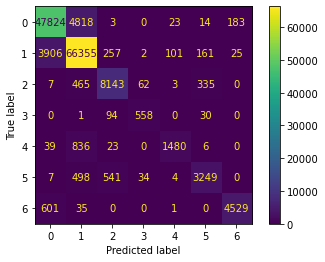

In [117]:
y_pred = rndTreeClf.predict(x_test)
report = classification_report(y_test,y_pred)
cnf = confusion_matrix(y_test,y_pred)

print(report)
ConfusionMatrixDisplay(cnf).plot()

In [ ]:
# KNN(3 neighbours) i RandomForest(100 trees) daju otprilike iste rezultate
